In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [70]:
df.shape

(1303, 12)

In [71]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [72]:
df['Ram']=df['Ram'].str.replace('GB','')

In [73]:
df['Weight']=df['Weight'].str.replace('kg','')

In [74]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [76]:
df['Price']=df['Price'].apply(lambda x:x*1.6)

In [77]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205.89312
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632.83712
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017.60000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312.53760
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753.29280


/tmp/ipykernel_29348/2229499591.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

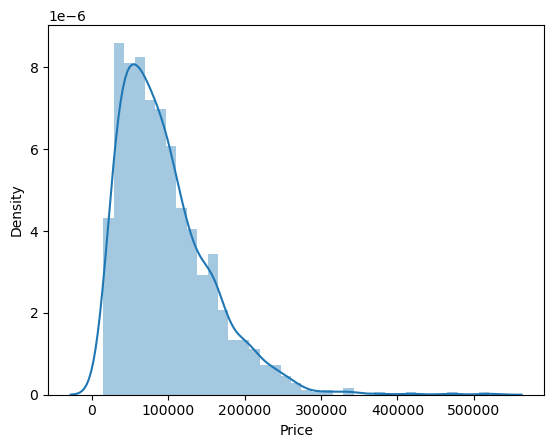

In [78]:
import seaborn as sns
sns.distplot(df['Price'])

<AxesSubplot: >

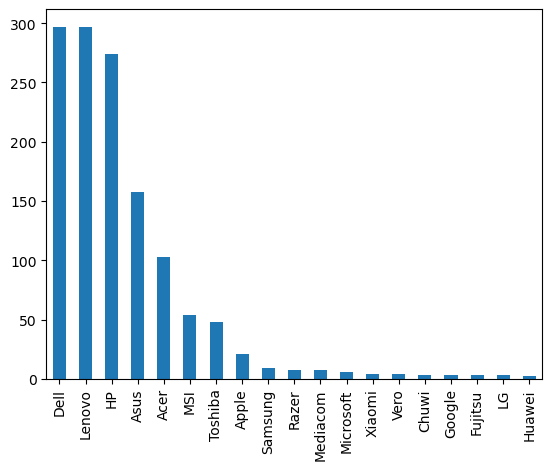

In [79]:
df['Company'].value_counts().plot(kind='bar')

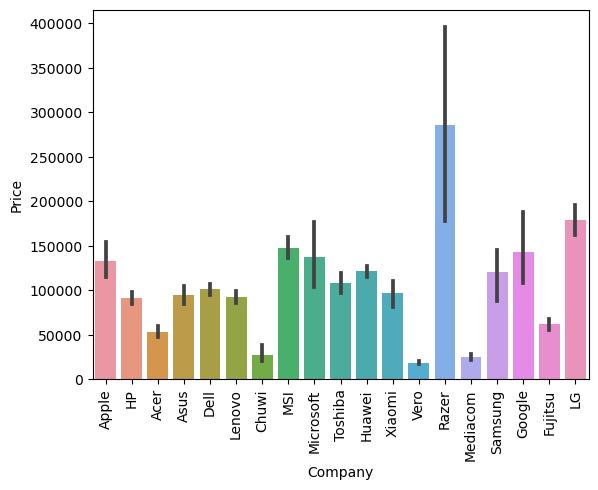

In [80]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical') 
plt.show()

In [81]:
df['Touchscreen']= df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [82]:
df['Ips']= df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [83]:
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205.89312,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632.83712,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017.60000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312.53760,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753.29280,0,1


In [84]:
def findXresolution(s):

  return s.split()[-1].split("x")[0]

def findYresolution(s):

  return s.split()[-1].split("x")[1]

findXresolution(df['ScreenResolution'][0])

'2560'

In [85]:
df['X_resolution']=df['ScreenResolution'].apply(findXresolution)
df['Y_resolution']=df['ScreenResolution'].apply(findYresolution)


In [86]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205.89312,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632.83712,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017.60000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312.53760,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753.29280,0,1,2560,1600


In [87]:
df['X_resolution']=df['X_resolution'].astype('int')
df['Y_resolution']=df['Y_resolution'].astype('int')

In [88]:
df.corr()['Price']

/tmp/ipykernel_29348/815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
Ips             0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price, dtype: float64

In [89]:
df['PPI']=((df['X_resolution']**2+df['Y_resolution']**2)**0.5/df['Inches']).astype('float')

In [90]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_resolution,Y_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205.89312,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632.83712,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017.60000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312.53760,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753.29280,0,1,2560,1600,226.983005


In [91]:
df.drop(columns=['ScreenResolution','Inches','X_resolution','Y_resolution'],inplace = True)

In [92]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205.89312,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632.83712,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017.60000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312.53760,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753.29280,0,1,226.983005


In [93]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [94]:
df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu, Length: 1303, dtype: object

In [95]:
df['Cpu_Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [96]:
def fetch_processor(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3' :
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [97]:
df['Cpu_Brand']=df['Cpu_Name'].apply(fetch_processor)

In [109]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu_Brand
202,Acer,Notebook,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23,63254.016,0,0,141.211998,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,19521.792,0,0,111.935204,Other Intel Processor
497,HP,Notebook,8,1TB SSD,Intel HD Graphics 620,Windows 10,1.48,149098.752,0,0,157.350512,Intel Core i7
122,Lenovo,Notebook,8,256GB SSD,Nvidia GeForce 940MX,No OS,2.20,53620.992,0,0,141.211998,Intel Core i5
507,Acer,Notebook,4,1TB HDD,Nvidia GeForce MX150,Windows 10,2.20,52257.024,0,1,141.211998,Intel Core i5


<AxesSubplot: >

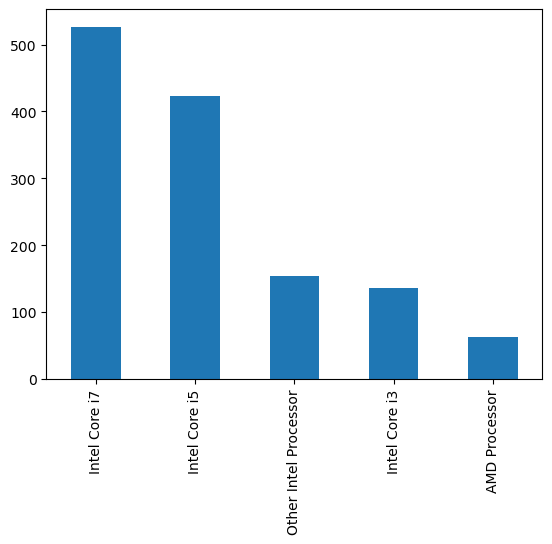

In [108]:
df['Cpu_Brand'].value_counts().plot(kind='bar')

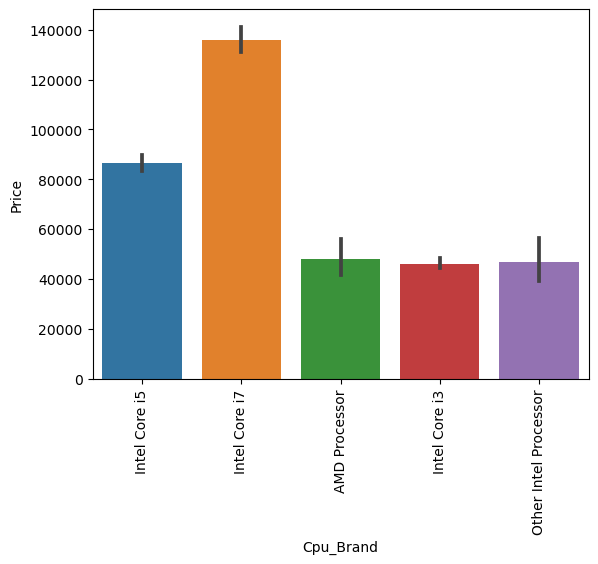

In [100]:
sns.barplot(x=df['Cpu_Brand'],y=df['Price'])
plt.xticks(rotation='vertical') 
plt.show()

In [101]:
df.drop(columns=['Cpu','Cpu_Name'],inplace =True)

In [139]:
df['SSD'] = df['Memory'].apply(lambda x: x.split('SSD')[0].split('GB')[0].split('TB')[0] if 'SSD' in x else 0)
df['HDD'] = df['Memory'].apply(lambda x: x.split('HDD')[0].split('TB')[0].split('GB')[0].split( )[-1] if 'HDD' in x else 0)
df['Flash'] = df['Memory'].apply(lambda x: x.split('Flash')[0].split('GB')[0] if 'Flash' in x else 0)
df['Hybrid'] = df['Memory'].apply(lambda x: x.split('Hybrid')[0].split('GB')[0].split('TB')[0] if 'Hybrid' in x else 0)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  PPI          1303 non-null   float64
 11  Cpu_Brand    1303 non-null   object 
 12  SSD          1303 non-null   object 
 13  HDD          1303 non-null   object 
 14  Flash        1303 non-null   object 
 15  Hybrid       1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(10)
memory usage: 152.8+ KB


In [141]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu_Brand,SSD,HDD,Flash,Hybrid
830,Razer,Gaming,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,468778.752,1,0,254.671349,Intel Core i7,512,0,0,0
1011,HP,Ultrabook,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.26,131196.672,0,0,176.232574,Intel Core i5,0,500,0,0
555,Asus,Notebook,4,500GB HDD,Intel HD Graphics 500,Linux,2.00,19095.552,0,0,100.454670,Other Intel Processor,0,500,0,0
269,Lenovo,Notebook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.05,75018.240,0,0,141.211998,Intel Core i7,256,0,0,0
614,Dell,Notebook,4,500GB HDD,Intel HD Graphics 620,Linux,1.93,74080.512,0,0,100.454670,Intel Core i5,0,500,0,0


In [142]:
df['Hybrid'].value_counts()

0      1291
1.0       9
508       1
512       1
256       1
Name: Hybrid, dtype: int64

In [145]:
df.corr()['Price']

/tmp/ipykernel_29348/815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
PPI            0.473487
SSD            0.553153
HDD           -0.035082
Flash         -0.040511
Hybrid         0.074421
Name: Price, dtype: float64

In [147]:
df['SSD']=df['SSD'].astype('int')
df['HDD']=df['HDD'].astype('float')
df['Flash']=df['Flash'].astype('int')
df['Hybrid']=df['Hybrid'].astype('float')

In [148]:
df.drop(columns=['Memory'],inplace=True)

In [149]:
df.drop(columns=['Hybrid','Flash'],inplace=True)

In [150]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [151]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu_Brand,SSD,HDD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,114205.89312,0,1,226.983005,Intel Core i5,128,0.0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,76632.83712,0,0,127.677940,Intel Core i5,0,0.0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,49017.60000,0,0,141.211998,Intel Core i5,256,0.0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,216312.53760,0,1,220.534624,Intel Core i7,512,0.0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,153753.29280,0,1,226.983005,Intel Core i5,256,0.0,Intel


In [152]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [153]:
df = df[df['Gpu brand'] != 'ARM']

In [154]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

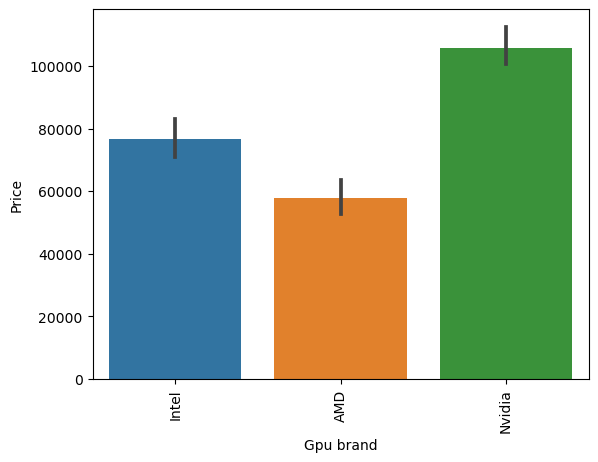

In [155]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()


In [156]:
df.drop(columns=['Gpu'],inplace=True)

/tmp/ipykernel_29348/1111925144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [157]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

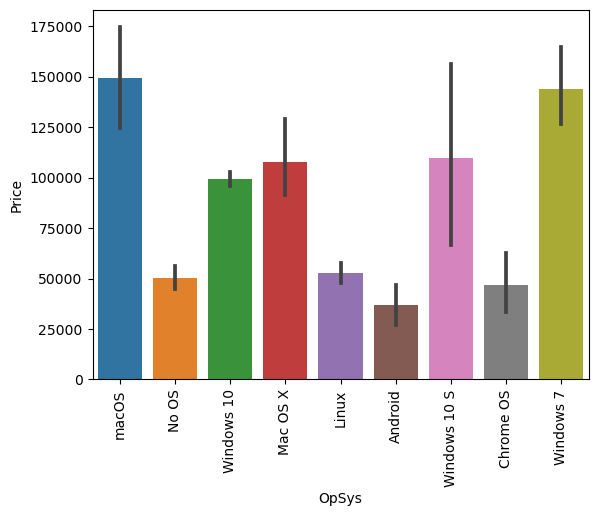

In [158]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


In [159]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'


In [160]:
df['os'] = df['OpSys'].apply(cat_os)

/tmp/ipykernel_29348/3648919379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [161]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu_Brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,114205.89312,0,1,226.983005,Intel Core i5,128,0.0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,76632.83712,0,0,127.677940,Intel Core i5,0,0.0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,49017.60000,0,0,141.211998,Intel Core i5,256,0.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,216312.53760,0,1,220.534624,Intel Core i7,512,0.0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,153753.29280,0,1,226.983005,Intel Core i5,256,0.0,Intel,Mac


In [162]:
df.drop(columns=['OpSys'],inplace=True)

/tmp/ipykernel_29348/3105339334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


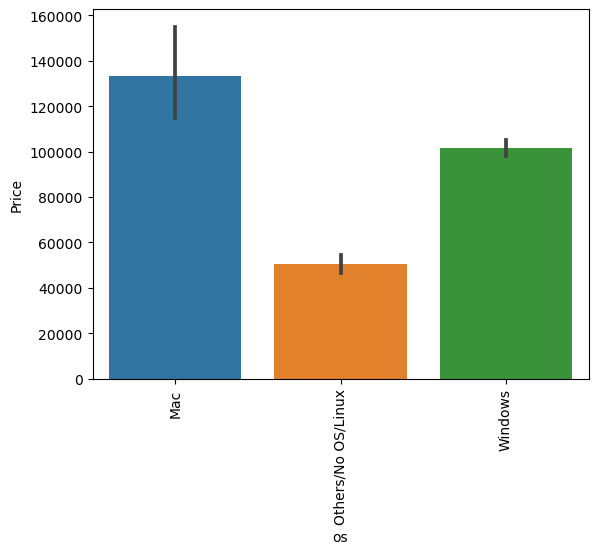

In [163]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipykernel_29348/1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<AxesSubplot: xlabel='Weight', ylabel='Density'>

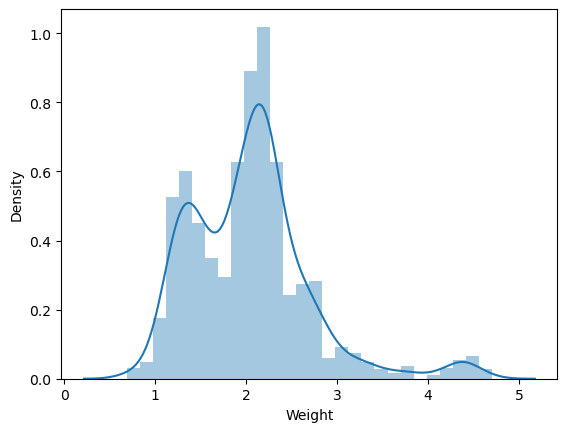

In [164]:
sns.distplot(df['Weight'])

In [165]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [166]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,PPI,Cpu_Brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,128,0.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256,0.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,512,0.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,256,0.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,128,0.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,512,0.0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0.0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0,1.0,AMD,Windows


In [167]:
y

0       11.645758
1       11.246781
2       10.799935
3       12.284480
4       11.943105
          ...    
1298    10.903903
1299    11.758118
1300     9.879287
1301    11.084132
1302    10.356361
Name: Price, Length: 1302, dtype: float64

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [189]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

lrpipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

lrpipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.8885304310152355
MAE 0.15535050679436027


/usr/lib/python3/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Random Forest

In [190]:
from sklearn.ensemble import RandomForestRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=5,
                              max_samples=0.6,
                              max_features=0.6,
                              max_depth=20)

rfpipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

rfpipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.8885304310152355
MAE 0.15535050679436027


/usr/lib/python3/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [191]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rfpipe,open('pipe.pkl','wb'))


In [192]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,PPI,Cpu_Brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,114205.89312,0,1,226.983005,Intel Core i5,128,0.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,76632.83712,0,0,127.677940,Intel Core i5,0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,49017.60000,0,0,141.211998,Intel Core i5,256,0.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,216312.53760,0,1,220.534624,Intel Core i7,512,0.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,153753.29280,0,1,226.983005,Intel Core i5,256,0.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,54388.22400,1,1,157.350512,Intel Core i7,128,0.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,127786.75200,1,1,276.053530,Intel Core i7,512,0.0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,19521.79200,0,0,111.935204,Other Intel Processor,0,0.0,Intel,Windows
1301,HP,Notebook,6,2.19,65129.47200,0,0,100.454670,Intel Core i7,0,1.0,AMD,Windows
